In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qcodes as qc
from qcodes.instrument_drivers.nplab_drivers.Keithley_2182a import Keithley_2182a
from qcodes.instrument_drivers.nplab_drivers.Keithley_6221 import Keithley_6221
import time

C:\Users\nplab\Anaconda3\envs\qcodes\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
ksense = Keithley_2182a('ksense', 'GPIB::7::INSTR')
ksour = Keithley_6221('ksour', 'GPIB::12::INSTR')

Connected to: KEITHLEY INSTRUMENTS INC. 2182A (serial:4319846, firmware:C06  /A02) in 0.13s
Connected to: KEITHLEY INSTRUMENTS INC. 6221 (serial:4307474, firmware:D03  /700x) in 0.03s


# Examples without Delta mode. Just simple DC current, DC reading, over 10 $  \Omega$ resistor 

With current $1 mA$, delay 1 s (set directly through 2182a front panel)

In [37]:
numpoints = 100
delay = 1
curr = 1e-3

In [38]:
ksour.write('SOUR:CURR '+str(curr))
ksour.output(1)
time.sleep(1)
ksense.write('TRAC:POIN '+str(numpoints))
ksense.write('TRAC:FEED sens')
ksense.write('TRAC:FEED:CONT next')

In [39]:
data = ksense.ask('TRAC:DATA?')

Standard Deviation: 7.791055323921167e-07 V


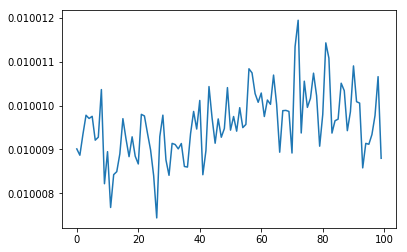

In [41]:
vals = np.fromstring(data, sep=',')
times = np.arange(0, len(vals))
print('Standard Deviation: {} V'.format(np.std(vals)))
plt.plot(times, vals)

With current 10 $\mu A$, delay 1 s

In [50]:
numpoints = 100
delay = 1
curr = 10e-6

In [51]:
ksour.write('SOUR:CURR '+str(curr))
ksour.output(1)
time.sleep(1)
ksense.write('TRAC:POIN '+str(numpoints))
ksense.write('TRAC:FEED sens')
ksense.write('TRAC:FEED:CONT next')

In [56]:
data2 = ksense.ask('TRAC:DATA?')

Standard Deviation: 1.3557694668304648e-07 V


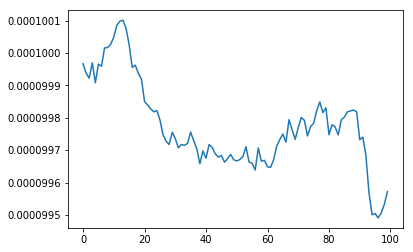

In [57]:
vals2 = np.fromstring(data2, sep=',')
times2 = np.arange(0, len(vals2))
print('Standard Deviation: {} V'.format(np.std(vals2)))
plt.plot(times2, vals2)

With current 10 $nA$, delay 1 s

In [58]:
numpoints = 100
delay = 1
curr = 10e-9

In [59]:
ksour.write('SOUR:CURR '+str(curr))
ksour.output(1)
time.sleep(1)
ksense.write('TRAC:POIN '+str(numpoints))
ksense.write('TRAC:FEED sens')
ksense.write('TRAC:FEED:CONT next')

In [60]:
data3 = ksense.ask('TRAC:DATA?')

Standard Deviation: 1.1587824715568783e-07 V


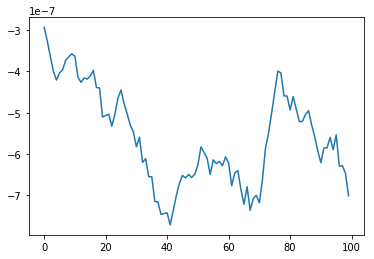

In [61]:
vals3 = np.fromstring(data3, sep=',')
times3 = np.arange(0, len(vals3))
print('Standard Deviation: {} V'.format(np.std(vals3)))
plt.plot(times3, vals3)

# Comparing to Delta Mode 

With 1 mA, 1 s delay

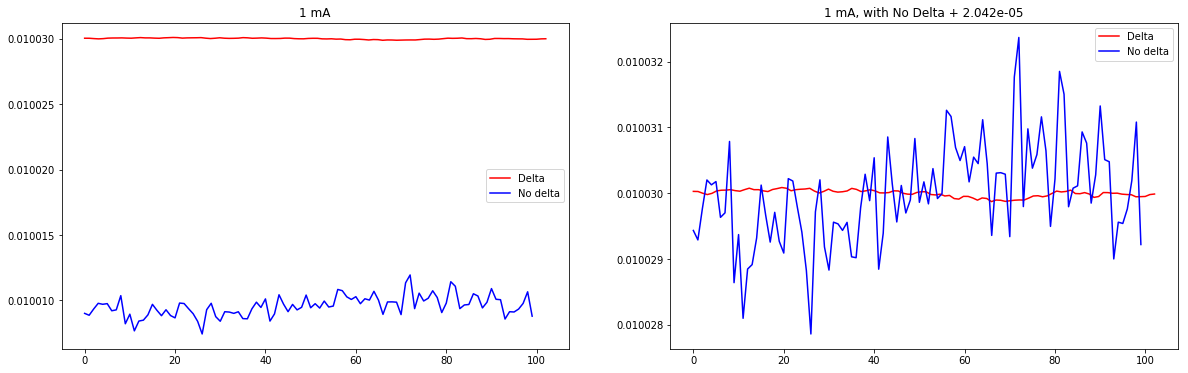

In [55]:
D = np.loadtxt('1mAdelta')
Dtimes = D[:,0]
Dvals = D[:,1]
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(Dtimes, Dvals, 'r', label='Delta')
plt.plot(times, vals, 'b', label='No delta')
plt.legend()
plt.title('1 mA')
plt.subplot(1,2,2)
added = np.mean(Dvals) - np.mean(vals)
plt.plot(Dtimes, Dvals, 'r', label='Delta')
plt.plot(times, vals+added, 'b', label='No delta')
plt.legend()
plt.title('1 mA, with No Delta + {:.3e}'.format(added))

With 10 $\mu A$, 1 s delay

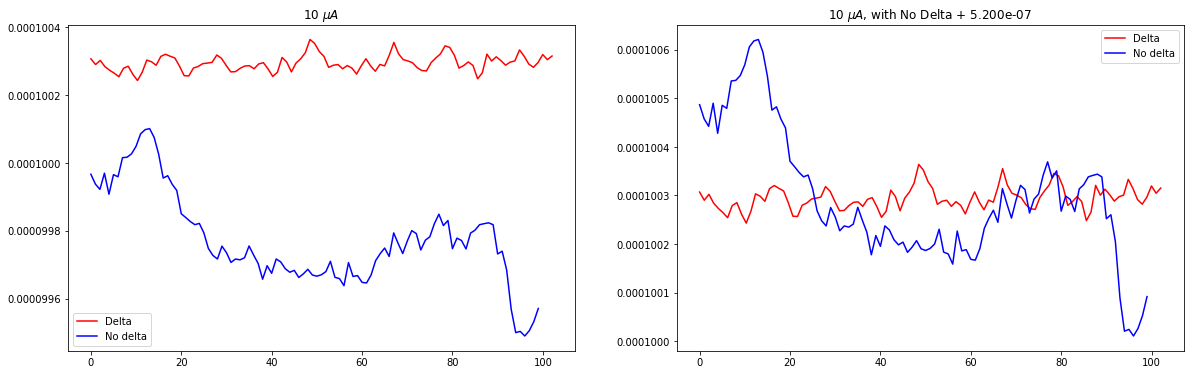

In [62]:
D2 = np.loadtxt('10uAdelta')
Dtimes2 = D2[:,0]
Dvals2 = D2[:,1]
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(Dtimes2, Dvals2, 'r', label='Delta')
plt.plot(times2, vals2, 'b', label='No delta')
plt.legend()
plt.title('10 $\mu A$')
plt.subplot(1,2,2)
added = np.mean(Dvals2) - np.mean(vals2)
plt.plot(Dtimes2, Dvals2, 'r', label='Delta')
plt.plot(times2, vals2+added, 'b', label='No delta')
plt.legend()
plt.title('10 $\mu A$, with No Delta + {:.3e}'.format(added))

With 10 $n A$, 1 s delay

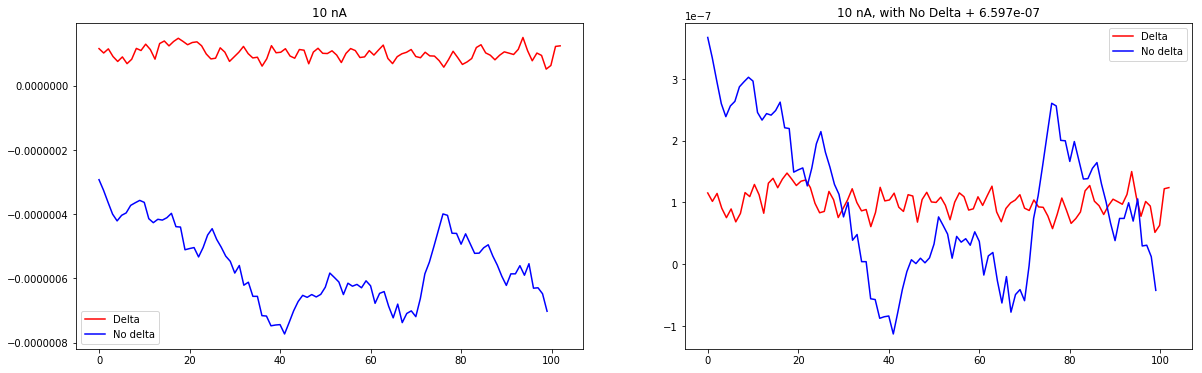

In [63]:
D3 = np.loadtxt('10nAdelta')
Dtimes3 = D3[:,0]
Dvals3 = D3[:,1]
plt.figure(figsize=(20, 6))
plt.subplot(1,2,1)
plt.plot(Dtimes3, Dvals3, 'r', label='Delta')
plt.plot(times3, vals3, 'b', label='No delta')
plt.legend()
plt.title('10 nA')
plt.subplot(1,2,2)
added = np.mean(Dvals3) - np.mean(vals3)
plt.plot(Dtimes3, Dvals3, 'r', label='Delta')
plt.plot(times3, vals3+added, 'b', label='No delta')
plt.legend()
plt.title('10 nA, with No Delta + {:.3e}'.format(added))

In [64]:
ksense.close()
ksour.output(0)
ksour.close()